# Medical_insurance_cost_prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#load the dataset
insurance_df = pd.read_csv("Medical_Insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#knowing the shape of the dataset
insurance_df.shape

(1338, 7)

In [6]:
#getting someinfo about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#checking for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#Data Analysis

In [9]:
#Statistical measures of the dataset
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\sarav\AppData\Local\Temp\ipykernel_18344\1582965811.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])


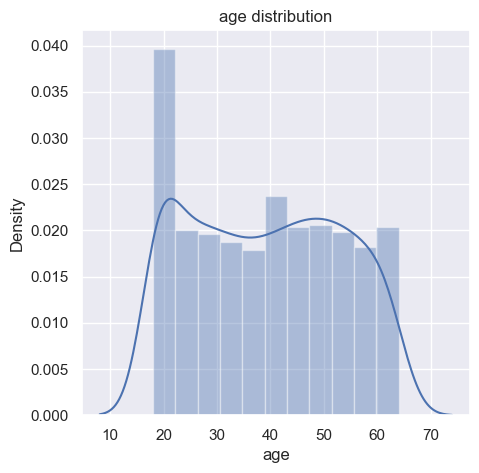

In [12]:
#distribution of age feature
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_df['age'])
plt.title('age distribution')
plt.show()

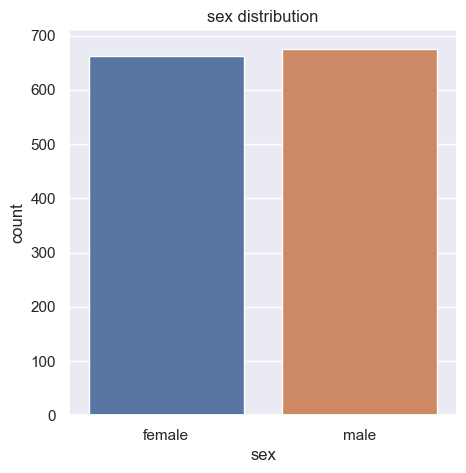

In [13]:
#count of sex feature
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data = insurance_df)
plt.title('sex distribution')
plt.show()

C:\Users\sarav\AppData\Local\Temp\ipykernel_18344\2208077179.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['bmi'])


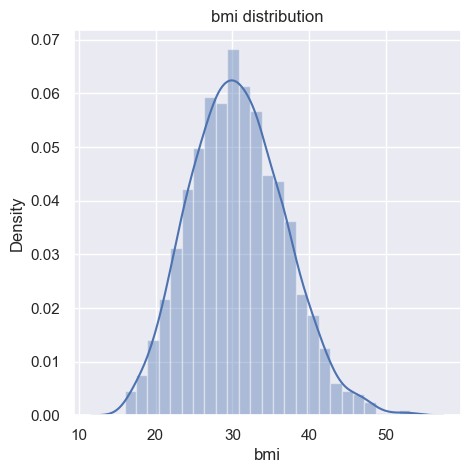

In [14]:
#distribution of bmi feature
plt.figure(figsize=(5,5))
sns.distplot(insurance_df['bmi'])
plt.title('bmi distribution')
plt.show()
#normal bmi range --> 18.5 to 24.9

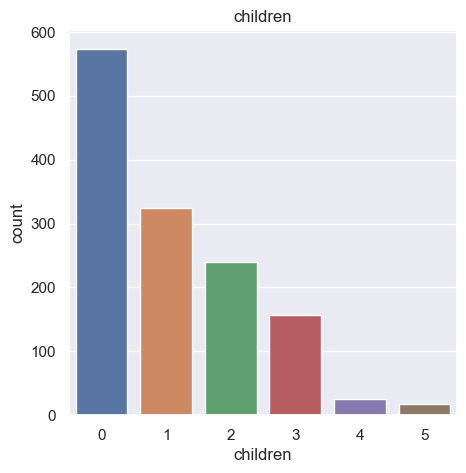

In [15]:
#Children feature
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=insurance_df)
plt.title('children')
plt.show()

In [16]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

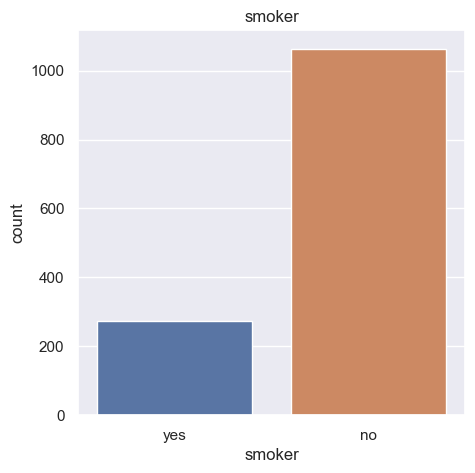

In [17]:
#Children feature
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=insurance_df)
plt.title('smoker')
plt.show()

In [18]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

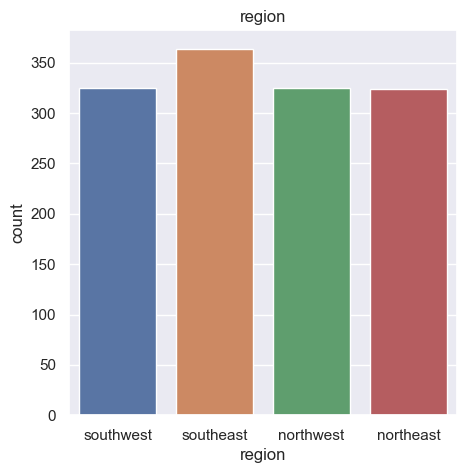

In [19]:
#region feature
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=insurance_df)
plt.title('region')
plt.show()

In [20]:
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\sarav\AppData\Local\Temp\ipykernel_18344\1250418902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'])


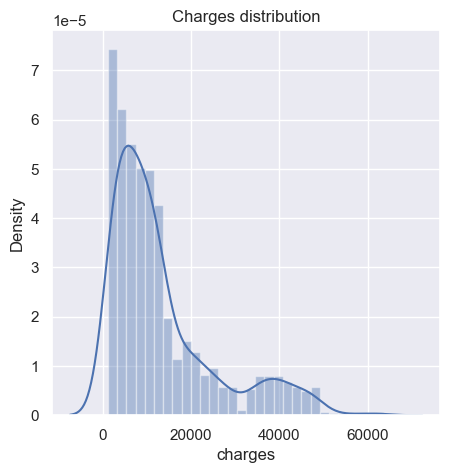

In [22]:
#distribution of charges
plt.figure(figsize=(5,5))
sns.distplot(insurance_df['charges'])
plt.title('Charges distribution')
plt.show()

# Data pre-processing

In [26]:
#Encoding the categorical features
insurance_df.replace({'sex':{'male':0,'female':1}}, inplace = True)
insurance_df.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
insurance_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [27]:
insurance_df['region'].unique()

array([1, 0, 3, 2], dtype=int64)

In [28]:
insurance_df['smoker'].unique()

array([0, 1], dtype=int64)

In [34]:
#splitting the dependent and independent feature
X = insurance_df.drop(columns = 'charges', axis = 1)
Y = insurance_df['charges']

In [35]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [37]:
#Splitting the data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [40]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1338,) (1070,) (268,)


# Model training

In [42]:
#load the linear regression model
regressor = LinearRegression()

In [43]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [46]:
#Evaluate the model using r - square value on test data
test_data_prediction = regressor.predict(X_test)


In [47]:
r_square_value = metrics.r2_score(Y_test, test_data_prediction)
print(r_square_value)

0.6941953631810804


# Building a predictive system

In [49]:
input_data = (31,1,25.74,0,1,0)
input_as_array = np.asarray(input_data)
input_reshape = input_as_array.reshape(1,-1)
prediction = regressor.predict(input_reshape)
print(prediction)

[3590.00446232]


D:\Softwares_files\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
print('The insurance cost is:', prediction[0])

The insurance cost is: 3590.0044623224194
